In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score


In [10]:
df2 = pd.read_csv(r"C:\Users\DCO-AP 2\Downloads\archive (1)\Unemployment in India.csv")

In [12]:
df2.head()
df2.columns = df2.columns.str.strip()


In [14]:
df2.dropna(inplace=True)
df2

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural
...,...,...,...,...,...,...,...
749,West Bengal,29-02-2020,Monthly,7.55,10871168.0,44.09,Urban
750,West Bengal,31-03-2020,Monthly,6.67,10806105.0,43.34,Urban
751,West Bengal,30-04-2020,Monthly,15.63,9299466.0,41.20,Urban
752,West Bengal,31-05-2020,Monthly,15.22,9240903.0,40.67,Urban


In [16]:
df2.isnull().sum()

Region                                     0
Date                                       0
Frequency                                  0
Estimated Unemployment Rate (%)            0
Estimated Employed                         0
Estimated Labour Participation Rate (%)    0
Area                                       0
dtype: int64

C:\Users\DCO-AP 2\AppData\Local\Temp\ipykernel_20040\1026348245.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="Region", y="Estimated Unemployment Rate (%)", data=df2, ci=None, palette="magma")
C:\Users\DCO-AP 2\AppData\Local\Temp\ipykernel_20040\1026348245.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Region", y="Estimated Unemployment Rate (%)", data=df2, ci=None, palette="magma")


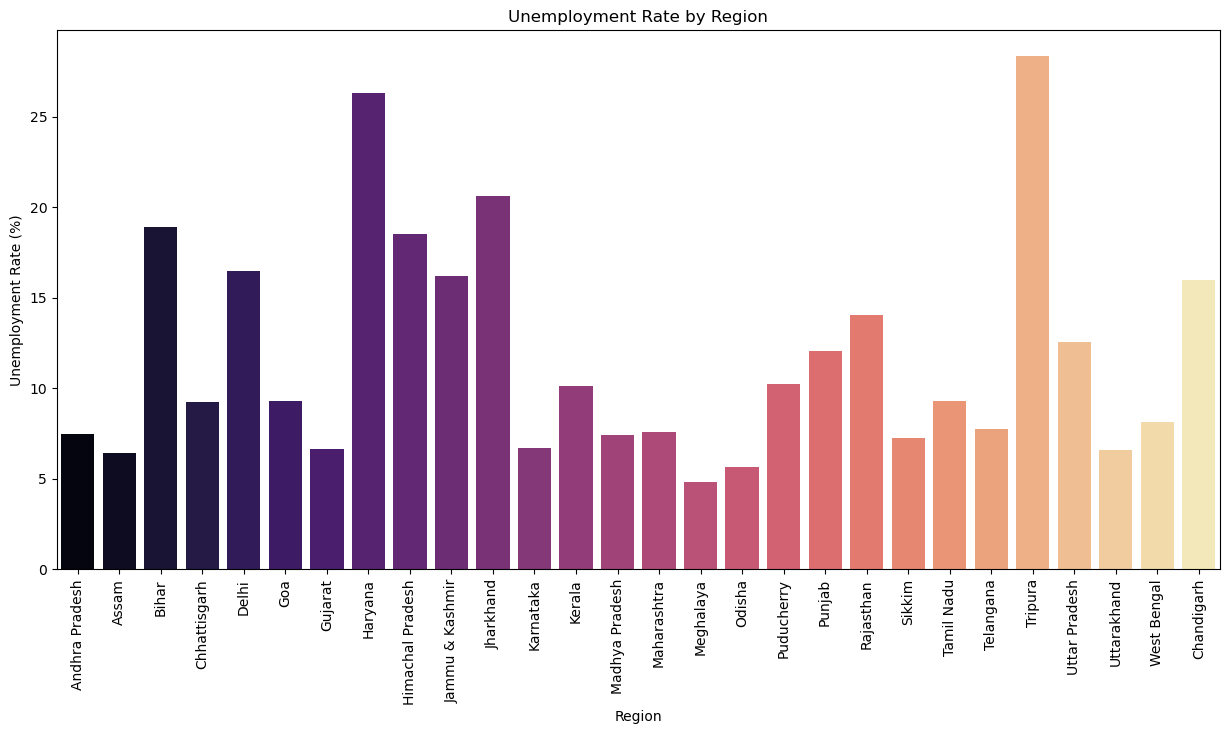

In [18]:
# Employment rate by region
plt.figure(figsize=(15, 7))
sns.barplot(x="Region", y="Estimated Unemployment Rate (%)", data=df2, ci=None, palette="magma")
plt.xticks(rotation=90)
plt.title("Unemployment Rate by Region")
plt.ylabel("Unemployment Rate (%)")
plt.xlabel("Region")
plt.show()

C:\Users\DCO-AP 2\AppData\Local\Temp\ipykernel_20040\1333828737.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Region", y="Estimated Labour Participation Rate (%)", data=df2, palette="Spectral")


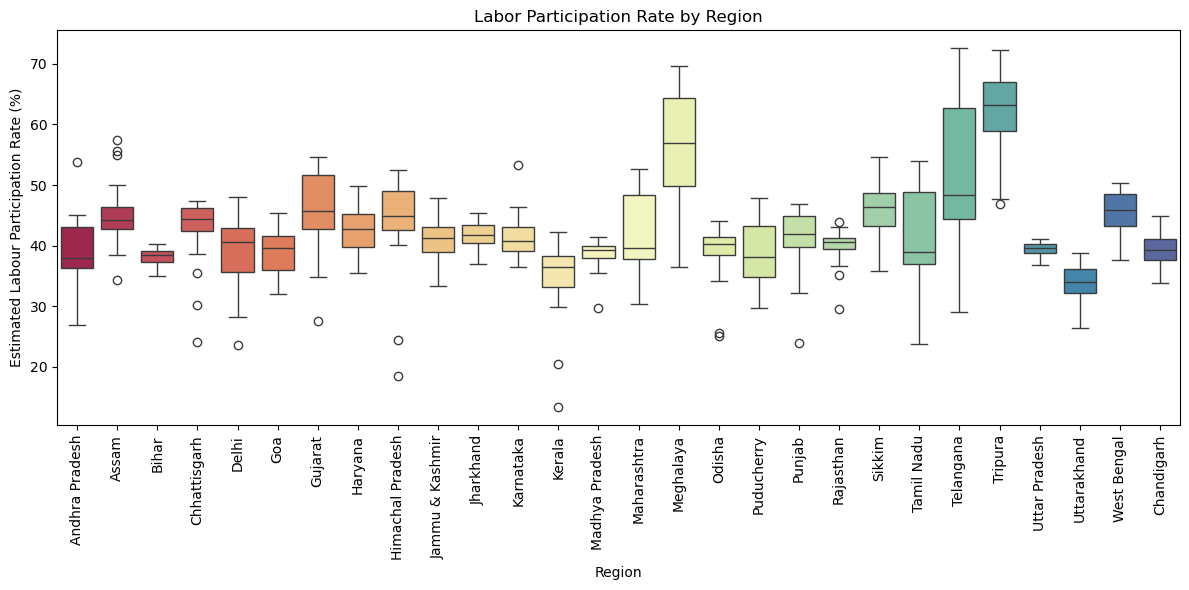

In [21]:
plt.figure(figsize=(12, 6))
sns.boxplot(x="Region", y="Estimated Labour Participation Rate (%)", data=df2, palette="Spectral")
plt.title("Labor Participation Rate by Region")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

C:\Users\DCO-AP 2\AppData\Local\Temp\ipykernel_20040\3960690437.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="Region", y="Estimated Labour Participation Rate (%)", data=df2, ci=None, palette="magma")
C:\Users\DCO-AP 2\AppData\Local\Temp\ipykernel_20040\3960690437.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Region", y="Estimated Labour Participation Rate (%)", data=df2, ci=None, palette="magma")


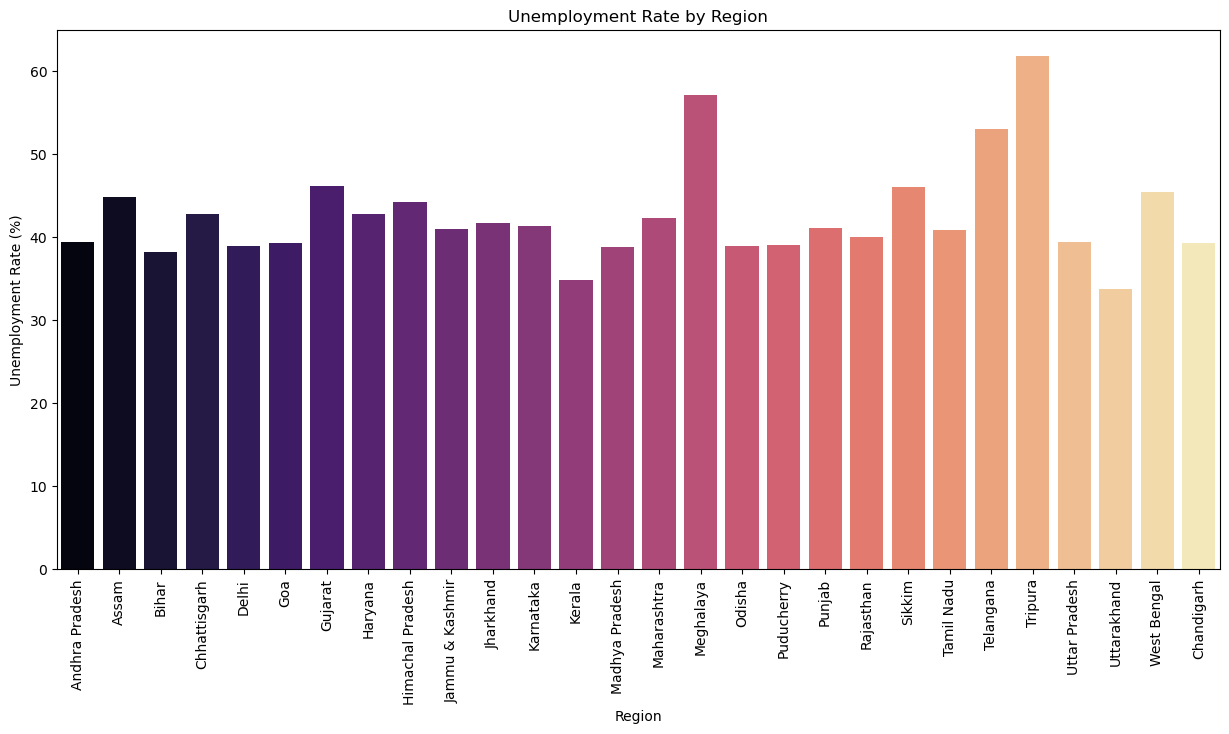

In [23]:
plt.figure(figsize=(15, 7))
sns.barplot(x="Region", y="Estimated Labour Participation Rate (%)", data=df2, ci=None, palette="magma")
plt.xticks(rotation=90)
plt.title("Unemployment Rate by Region")
plt.ylabel("Unemployment Rate (%)")
plt.xlabel("Region")
plt.show()

In [25]:
avg= df2.groupby('Region')[['Estimated Unemployment Rate (%)', 
                                       'Estimated Labour Participation Rate (%)']].mean()
avg

,Estimated Unemployment Rate (%),Estimated Labour Participation Rate (%)
Region,,
Andhra Pradesh,7.477143,39.375714
Assam,6.428077,44.868462
Bihar,18.918214,38.153929
Chandigarh,15.991667,39.336667
Chhattisgarh,9.240357,42.810714
Delhi,16.495357,38.929643
Goa,9.274167,39.249583
Gujarat,6.663929,46.101071
Haryana,26.283214,42.737143


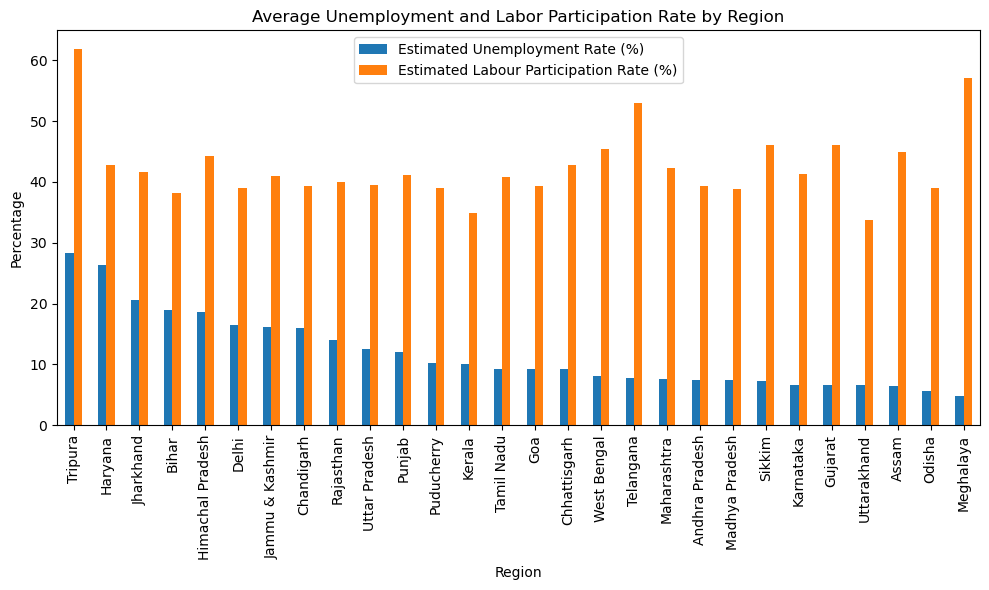

In [27]:
avg.sort_values(by="Estimated Unemployment Rate (%)", ascending=False).plot(kind="bar", figsize=(10, 6))
plt.title("Average Unemployment and Labor Participation Rate by Region")
plt.ylabel("Percentage")
plt.tight_layout()
plt.show()


C:\Users\DCO-AP 2\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:\Users\DCO-AP 2\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:\Users\DCO-AP 2\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:\Users\DCO-AP 2\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
C:\Users\DCO-AP 2\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
C:\Users\DCO-AP 2\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1615: UserWarning: Ignoring `palette` b

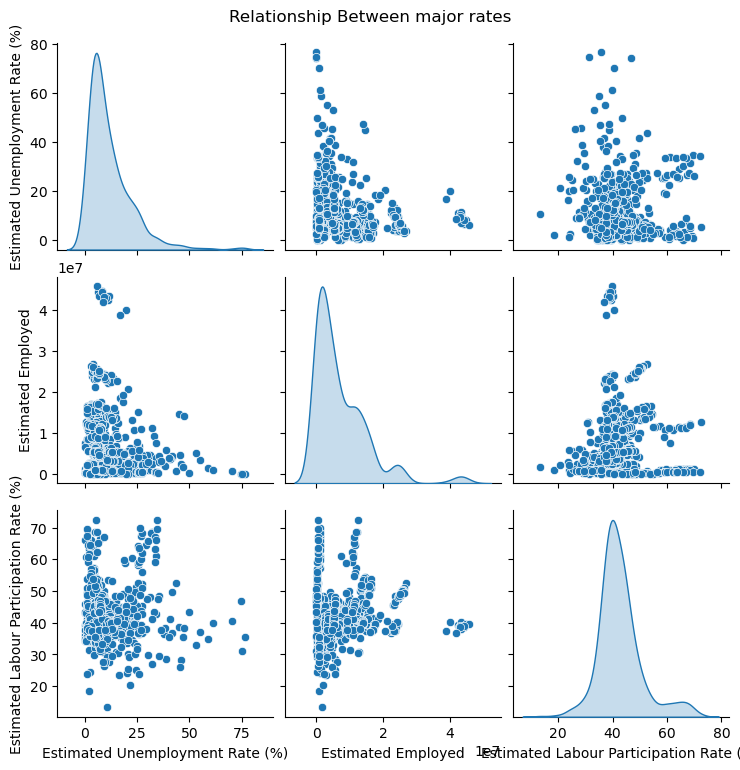

In [29]:
pair_data = df2[["Estimated Unemployment Rate (%)", "Estimated Employed", 
                   "Estimated Labour Participation Rate (%)"]]
sns.pairplot(pair_data, diag_kind="kde", palette="husl", markers="o")
plt.suptitle("Relationship Between major rates", y=1.02)
plt.show()

In [33]:
df3 = pd.read_csv(r"C:\Users\DCO-AP 2\Downloads\archive (1)\Unemployment_Rate_upto_11_2020.csv")

In [35]:
df3.isnull().sum()

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Region.1                                    0
longitude                                   0
latitude                                    0
dtype: int64

In [39]:
df3.columns = df3.columns.str.strip()
df3.head(3)

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74


In [41]:
df3['Date'] = pd.to_datetime(df3['Date'], errors='coerce')
df3 = df3.dropna(subset=['Date'])

C:\Users\DCO-AP 2\AppData\Local\Temp\ipykernel_20040\789600161.py:1: UserWarning: Parsing dates in  %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df3['Date'] = pd.to_datetime(df3['Date'], errors='coerce')


In [43]:
covid_data = df3[df3['Date'].dt.year == 2020]
covid_data.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,2020-01-31,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,2020-02-29,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,2020-03-31,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,2020-04-30,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,2020-05-31,M,17.43,12988845,36.46,South,15.9129,79.74


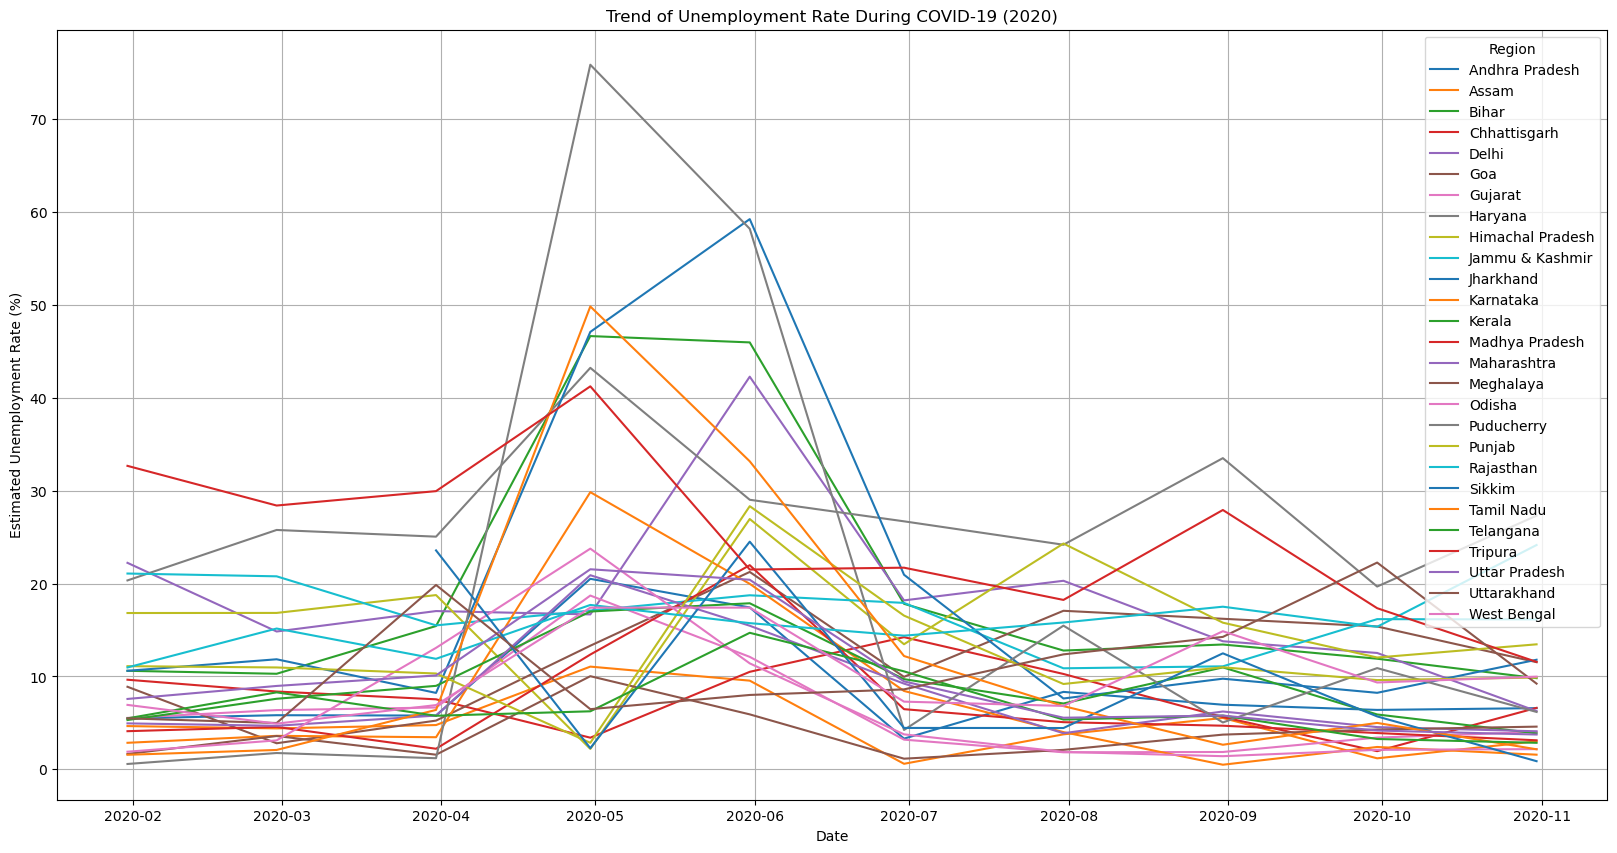

In [45]:
plt.figure(figsize=(20, 10))
sns.lineplot(data=covid_data, x='Date', y='Estimated Unemployment Rate (%)', hue='Region', palette='tab10')
plt.title("Trend of Unemployment Rate During COVID-19 (2020)")
plt.xlabel("Date")
plt.ylabel("Estimated Unemployment Rate (%)")
plt.grid(True)
plt.show()

C:\Users\DCO-AP 2\AppData\Local\Temp\ipykernel_20040\2773865232.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=covid_data, x='Region', y='Estimated Unemployment Rate (%)', palette='Set2')


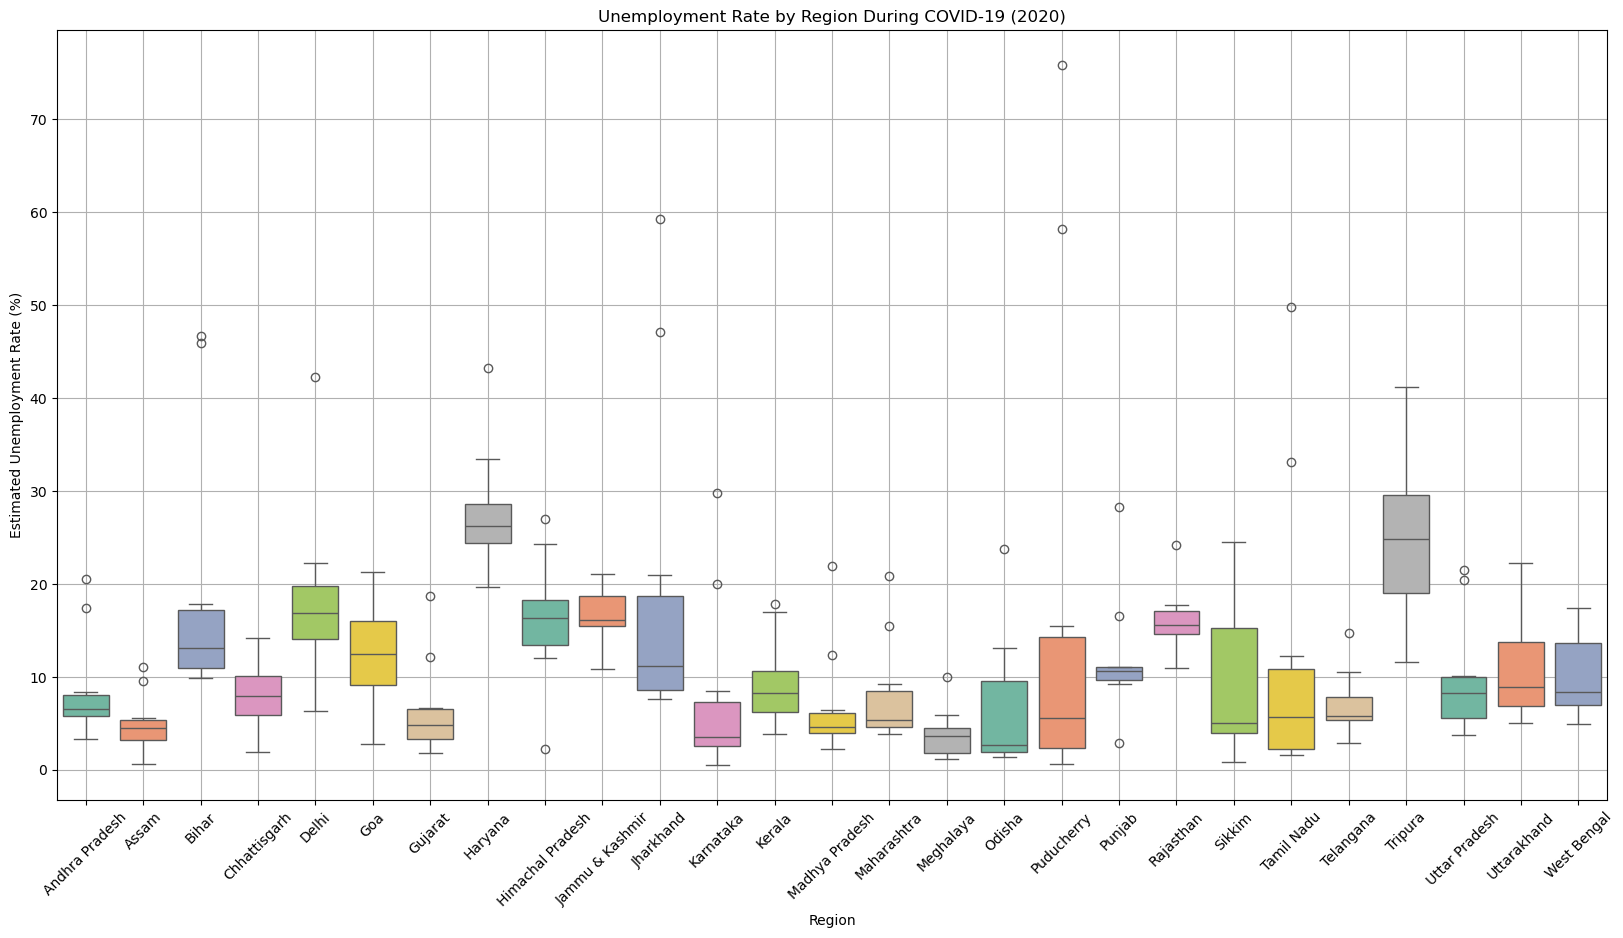

In [47]:
plt.figure(figsize=(20, 10))
sns.boxplot(data=covid_data, x='Region', y='Estimated Unemployment Rate (%)', palette='Set2')
plt.title("Unemployment Rate by Region During COVID-19 (2020)")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

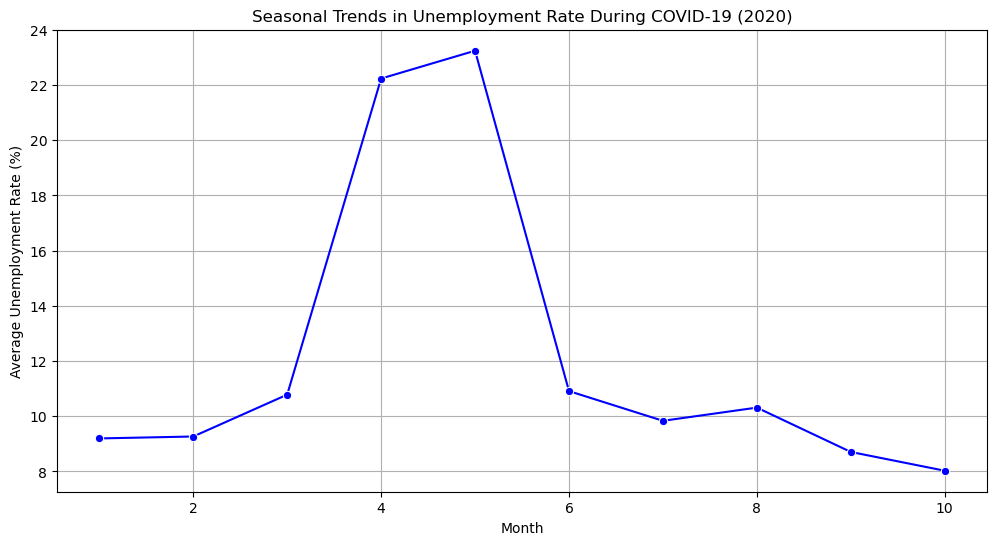

In [49]:
covid_data['Month'] = covid_data['Date'].dt.month
monthly_avg = covid_data.groupby('Month')['Estimated Unemployment Rate (%)'].mean().reset_index()

plt.figure(figsize=(12,6))
sns.lineplot(x='Month', y='Estimated Unemployment Rate (%)', data=monthly_avg, marker='o', color='blue')
plt.title("Seasonal Trends in Unemployment Rate During COVID-19 (2020)")
plt.xlabel("Month")
plt.ylabel("Average Unemployment Rate (%)")
plt.grid(True)
plt.show()

C:\Users\DCO-AP 2\AppData\Local\Temp\ipykernel_20040\2155485593.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=state_avg.values, y=state_avg.index, palette='viridis')


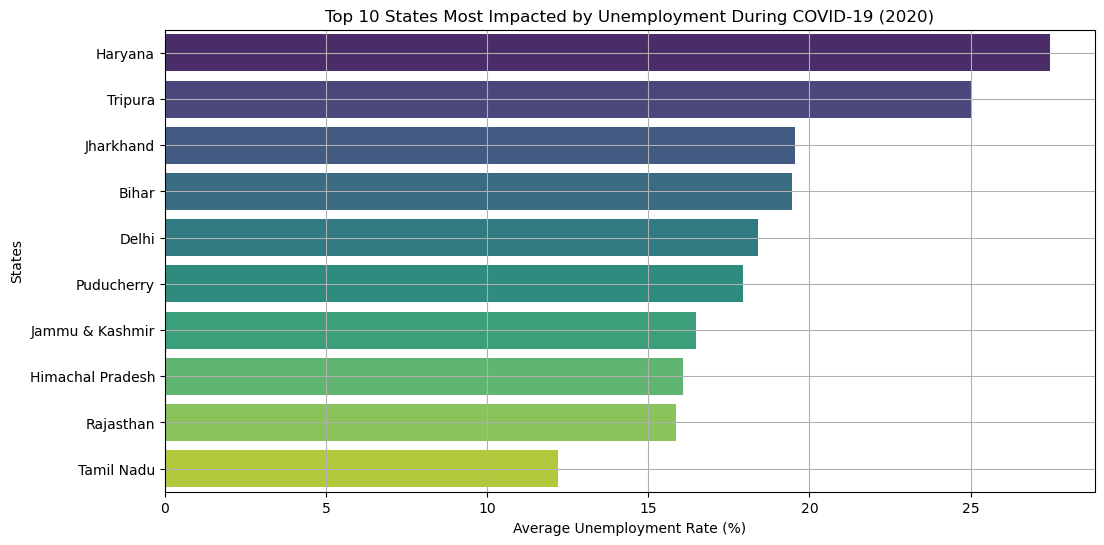

In [51]:
state_avg = covid_data.groupby('Region')['Estimated Unemployment Rate (%)'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=state_avg.values, y=state_avg.index, palette='viridis')
plt.title("Top 10 States Most Impacted by Unemployment During COVID-19 (2020)")
plt.xlabel("Average Unemployment Rate (%)")
plt.ylabel("States")
plt.grid(True)
plt.show()